In [3]:
import pandas as pd
df = pd.read_csv(r'pv.csv')
df

,Date,Close,Open,High,Low,Volume
0,"Jan 10, 2023","17,439.10","17,180.10","17,491.00","17,151.70",247.14K
1,"Jan 09, 2023","17,180.10","17,119.00","17,390.80","17,107.10",301.24K
2,"Jan 08, 2023","17,119.00","16,943.60","17,119.00","16,913.80",144.84K
3,"Jan 07, 2023","16,943.60","16,950.90","16,979.60","16,909.70",110.48K
4,"Jan 06, 2023","16,950.90","16,829.80","17,012.30","16,707.60",233.47K
...,...,...,...,...,...,...
1101,"Jan 05, 2020","7,372.50","7,376.80","7,501.00","7,345.60",628.14K
1102,"Jan 04, 2020","7,376.80","7,345.10","7,433.10","7,291.40",523.91K
1103,"Jan 03, 2020","7,343.10","6,967.10","7,402.90","6,884.10",936.29K
1104,"Jan 02, 2020","6,967.00","7,199.70","7,209.60","6,901.40",632.78K


In [4]:
def convert_volume(volume):
    if volume[-1] == 'K':
        return float(volume[:-1]) * 10**3
    elif volume[-1] == 'M':
        return float(volume[:-1]) * 10**6
    elif volume[-1] == 'B':
        return float(volume[:-1]) * 10**9
    else:
        return float(volume)

df['Volume'] = df['Volume'].apply(convert_volume)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date',ascending=True).reset_index(drop=True)
df

,Date,Close,Open,High,Low,Volume
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420280.0
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632780.0
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936290.0
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523910.0
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628140.0
...,...,...,...,...,...,...
1101,2023-01-06,"16,950.90","16,829.80","17,012.30","16,707.60",233470.0
1102,2023-01-07,"16,943.60","16,950.90","16,979.60","16,909.70",110480.0
1103,2023-01-08,"17,119.00","16,943.60","17,119.00","16,913.80",144840.0
1104,2023-01-09,"17,180.10","17,119.00","17,390.80","17,107.10",301240.0


In [6]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low']=df['Low'].str.replace(',', '').astype(float)


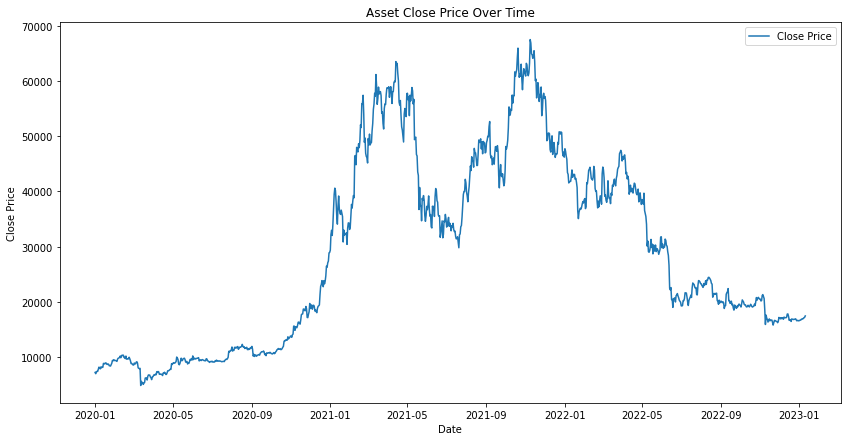

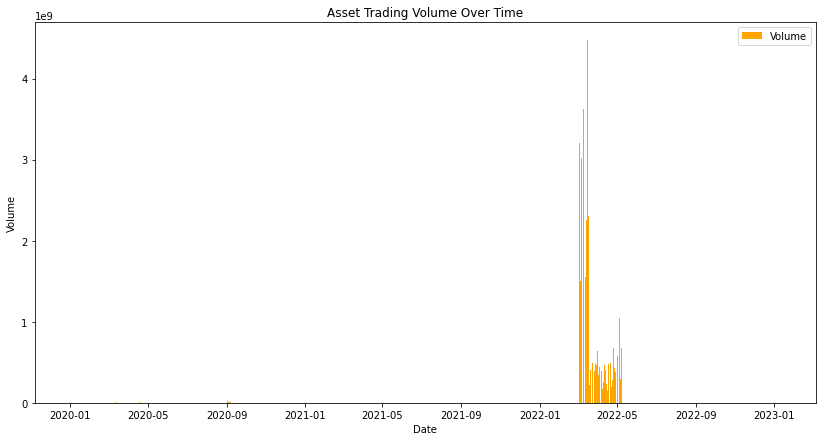

In [7]:
import matplotlib.pyplot as plt

# 绘制收盘价的时间序列图
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Asset Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 绘制成交量的时间序列图
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Volume'], color='orange', label='Volume')
plt.title('Asset Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
# plt.ylim(0, 50000000)  # 设置y轴的范围为0到500,000
plt.show()

In [8]:
#对volume这一列进行MAD去极值
# def remove_outliers_mad(df, column):
#     median = df[column].median()
#     mad = abs(df[column] - median).median()
#     threshold = 3 * mad
#     upper_bound = median + threshold
#     lower_bound = median - threshold
#     df[column] = df[column].clip(lower_bound, upper_bound)
#     return df

In [9]:
# df_cleaned = remove_outliers_mad(df, 'Volume')
# plt.figure(figsize=(14, 7))
# plt.bar(df_cleaned['Date'], df_cleaned['Volume'], color='orange', label='Volume')
# plt.title('Asset Trading Volume Over Time')
# plt.xlabel('Date')
# plt.ylabel('Volume')
# plt.legend()
# plt.ylim(0, 500000)  # 设置y轴的范围为0到500,000
# plt.show()

In [10]:
df.describe()

,Close,Open,High,Low,Volume
count,1106.000000,1106.000000,1106.000000,1106.000000,1.106000e+03
mean,28778.358951,28769.478481,29520.326492,27923.271519,5.506702e+07
std,17066.832431,17075.785319,17546.113853,16524.599183,3.258311e+08
min,4826.000000,4815.200000,5369.300000,3869.500000,2.600000e+02
25%,11710.275000,11686.100000,11827.325000,11470.850000,8.107250e+04
50%,23305.800000,23305.800000,24082.800000,22824.650000,1.580600e+05
75%,42813.775000,42810.200000,43903.725000,41829.350000,4.697650e+05
max,67527.900000,67528.700000,68990.600000,66334.900000,4.470000e+09


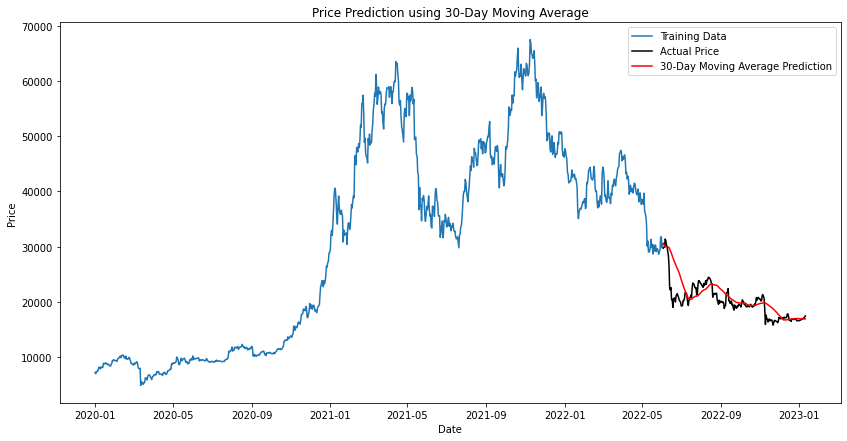

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 定义函数进行移动平均预测
# def moving_average_forecast(series, n):
#     df = series.rolling(n).mean()
#     return df
# N = 5  # 定义移动平均的窗口大小
# train_size = int(len(df) * 0.8)  # 80%的数据用于训练
# train_set, test_set = df.iloc[:train_size], df.iloc[train_size:]
# # 为了预测测试集，我们需要包含训练集的最后N-1个观察值
# ma_train_series = train_set['Close'].dropna().tolist()
# ma_test_series = test_set['Close'].tolist()
# ma_combined_series = ma_train_series[-(N-1):] + ma_test_series
# ma_predictions = []
# for i in range(len(test_set)):
#     ma_predictions.append(np.mean(ma_combined_series[i:i+N]))
# print(ma_predictions)
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)
import matplotlib.pyplot as plt

#移动平均线做法
test_data = test_data.dropna()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_data['Date'], train_data['Close'], label='Training Data')
plt.plot(test_data['Date'], test_data['Close'], color='black', label='Actual Price')
plt.plot(test_data['Date'], test_data['30_day_MA'], color='red', label='30-Day Moving Average Prediction')

plt.title('Price Prediction using 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

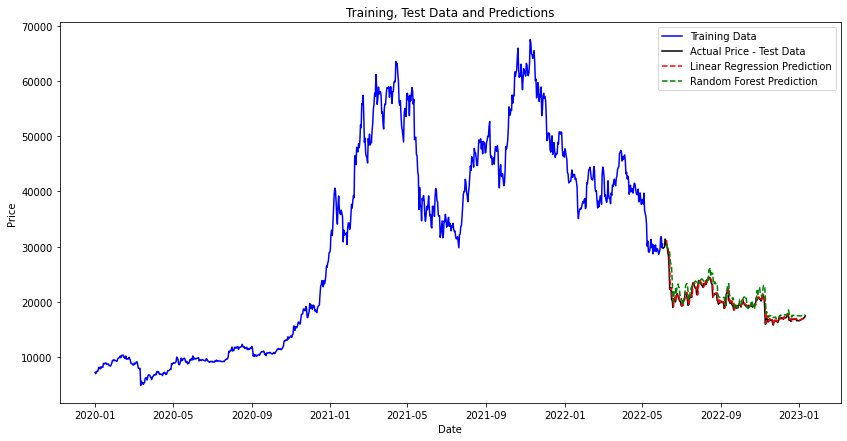

In [16]:
#线性回归和机器学习
#线性回归方法
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
def create_features(data, N=5):
    X, y = [], []
    for i in range(N, len(data)):
        X.append(data[i-N:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train_5, y_train_5 = create_features(train_data['Close'].values, N=5)
X_test_5, y_test_5 = create_features(test_data['Close'].values, N=5)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train_5, y_train_5)
lr_predictions = lr_model.predict(X_test_5)
rf_model.fit(X_train_5, y_train_5)
rf_predictions = rf_model.predict(X_test_5)


plt.figure(figsize=(14, 7))

plt.plot(train_data['Date'], train_data['Close'], color='blue', label='Training Data')

plt.plot(test_data['Date'], test_data['Close'], color='black', label='Actual Price - Test Data')

plt.plot(test_data['Date'][5:], lr_predictions, color='red', linestyle='--', label='Linear Regression Prediction')
plt.plot(test_data['Date'][5:], rf_predictions, color='green', linestyle='--', label='Random Forest Prediction')

plt.title('Training, Test Data and Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()